# 概览
原始新闻表格 -> 故事线 -> 嵌入表示

In [1]:
import pandas as pd
import numpy as np

# 示例新闻数据
- 新闻
- 时间
- 相关信息,如相关股票

In [2]:
import pickle
with open('test/news-go.pkl', 'rb') as f:
    data = pickle.load(f)
    docs = data['news']
    ts = data['ts']
raw_data = pd.DataFrame({'date':ts, 'news':docs, 'related':ts})

# 通过主题模型建立故事线

In [ ]:
from news.storyline.utils import build_stroylines_by_topic

In [ ]:
storylines = build_stroylines_by_topic(raw_data, 'news', 'date', 'related')

# 示例故事线（仅时间）

In [3]:
data = pd.read_csv('test/t2.csv')
t2 = pd.to_datetime(data['date'])

# 准备故事线

In [4]:
from news.storyline.model import Storyline

In [5]:
sl = Storyline(
    news=data['Unnamed: 0'],
    time=t2,
    related=data['Unnamed: 0']
)

# 分析故事线强度变化

In [6]:
from news.storyline.model import StrengthAnalyzer

In [7]:
sar = StrengthAnalyzer()

In [8]:
sl = sar.sort_by_time(sl)

In [9]:
sl = sar.estimate(sl)

# 寻找强度转折点

In [10]:
from news.storyline.model import Breakpoint

In [17]:
bps = Breakpoint.find_breakpoints(sl)

In [18]:
import numpy as np

lls = np.load('test/lls.npy')
tls = np.load('test/tls.npy')

Text(0, 0.5, '似然函数值')

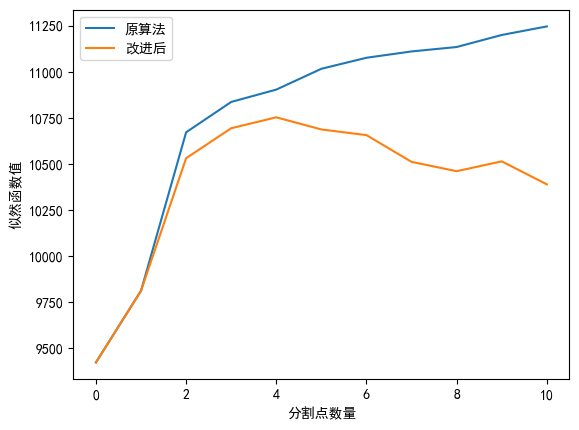

In [25]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams ['axes.unicode_minus'] = False

plt.plot(lls)
plt.plot(tls)
plt.legend(['原算法','改进后'])
plt.xlabel('分割点数量')
plt.ylabel('似然函数值')

## 找到的可能的强度转折点

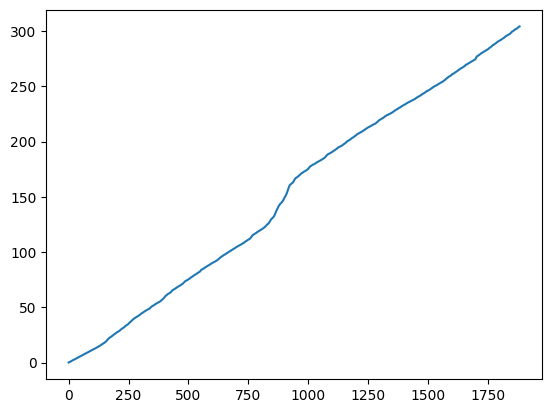

In [16]:
import matplotlib.pyplot as plt

plt.plot(sl.strength.cumsum())

In [12]:
bps

136    2018-02-22 01:45:00
835    2018-06-03 22:22:00
947    2018-06-06 22:36:00
1697   2018-10-23 05:12:00
Name: time, dtype: datetime64[ns]

# 故事线嵌入表示

In [ ]:
from news.storyline.embedding import StorylineEmbedding

In [ ]:
sl_embedding_model = StorylineEmbedding()

In [ ]:
sl_embedding = sl_embedding_model(sl)